# Algorithme des k-moyennes

<iframe
    src="https://mozilla.github.io/pdf.js/web/viewer.html?file=https://raw.githubusercontent.com/cpge-itc/itc2/main/files/5_kmeans/kmeans.pdf#zoom=page-fit&pagemode=none"
    height=500 width=100% allowfullscreen></iframe>

## Génération des données

On génère des points aléatoirement, ainsi que k = 4 centres initialement aléatoires :

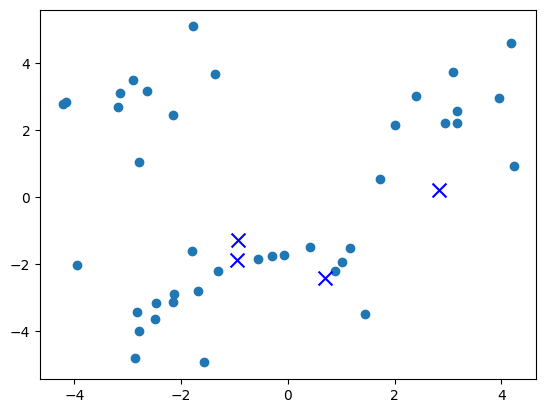

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

k, dim = 4, 2
X = np.vstack([np.array(p + np.random.randn(10, dim)) for p in [[3, 2], [0, -2], [-3, 3], [-3, -3]]]).tolist()
centres = (np.random.rand(k, dim)*6 - 3).tolist()
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.scatter([x[0] for x in centres], [x[1] for x in centres], marker='x', s=100, c='b')
plt.show()


## Code

In [36]:
def centre(X):
    c = [0.]*dim
    for x in X:
        for i in range(len(x)):
            c[i] += x[i]
    if len(X) == 0: return c
    for i in range(len(c)):
        c[i] /= len(X)
    return c

def calculer_centres(classes, k):
    centres = []
    for i in range(k):
        centres.append(centre(classes[i]))
    return centres

def d(x, y):
    s = 0.
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return s**.5

def plus_proche(x, centres):
    imin = 0
    for i in range(len(centres)):
        if d(x, centres[i]) < d(x, centres[imin]):
            imin = i
    return imin

def calculer_classes(X, centres, k):
    classes = [[] for i in range(k)]
    for x in X:
        classes[plus_proche(x, centres)].append(x)
    return classes

def kmeans(X, k, centres):
    centres2 = None
    while centres != centres2:
        centres2 = centres
        classes = calculer_classes(X, centres2, k)
        centres = calculer_centres(classes, k)
    return classes

def inertia(classes, centres, k):
    s = 0.
    for i in range(k):
        for x in classes[i]:
            s += d(x, centres[i])**2
    return s

## Test

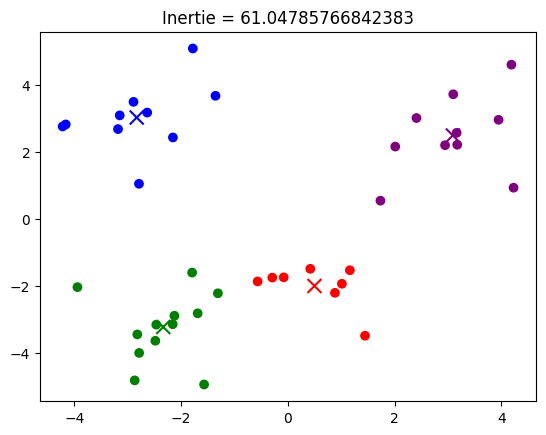

In [37]:
classes = kmeans(X, k, centres) # test de kmeans

cmap = ListedColormap(['r', 'g', 'b', 'purple'])
centres = calculer_centres(classes, k)
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[plus_proche(x, centres) for x in X], cmap=cmap)
plt.scatter([x[0] for x in centres], [x[1] for x in centres], marker='x', s=100, c=range(k), cmap=cmap)
plt.title("Inertie = " + str(inertia(classes, centres, k)))
plt.show()

## Inertie et *elbow method*

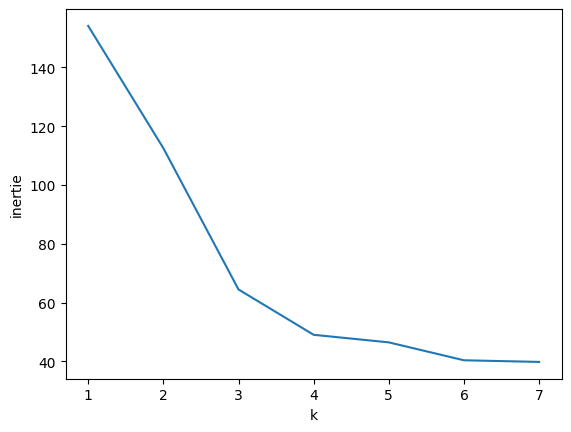

In [31]:
kmax = 7
inertie = []
for k in range(1, kmax+1):
    centres = (np.random.rand(k, dim)*6 - 3).tolist()
    classes = kmeans(X, k, centres)
    centres = calculer_centres(classes, k)
    inertie.append(inertia(classes, centres, k))
plt.plot(range(1, kmax+1), inertie)
plt.xlabel("k")
plt.ylabel("inertie")
plt.show()

## Animation

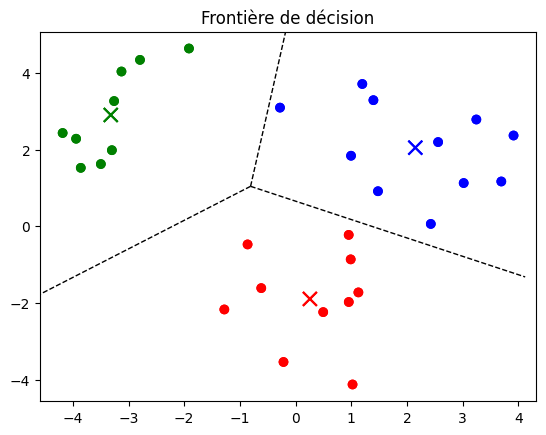

In [19]:
from pathlib import Path
from scipy.spatial import Voronoi, voronoi_plot_2d

p = 3
X = np.vstack([np.array(p + np.random.randn(10, 2)) for p in [[3, 2], [0, -2], [-3, 3]]])
centres, new_centres, classes = np.random.rand(3, 2)*6 - 3, None, None

def scatter(X, **kwargs): plt.scatter(X[:,0], X[:,1], cmap=ListedColormap(['r', 'g', 'b']), **kwargs)
def save(title):
    global p
    scatter(centres, marker='x', s=100, c=[0, 1, 2])
    scatter(X, c=classes)
    plt.title(title)
    plt.savefig(f'img/kmean_{p}.png')
    p += 1
def d(a, b): return np.sum((a-b)**2)

for f in Path('img').glob('*.png'): f.unlink()
scatter(X)
plt.title("Données que l'on souhaite classifier")
plt.savefig(f'img/kmean_1.png')
scatter(centres, marker='x', s=100, c=[0, 1, 2])
plt.title("Choix initial des centres")
plt.savefig(f'img/kmean_2.png')

while True:
    classes = np.array([np.argmin([d(x, c) for c in centres]) for x in X])
    plt.clf()
    save("Association de chaque donnée au centre le plus proche")

    new_centres = np.array([X[classes==i].mean(axis=0) for i in range(3)])
    if np.allclose(centres, new_centres): break

    centres = new_centres
    plt.clf()
    save("Mise à jour des centres")

ax = plt.gca()
x, y = ax.get_xlim(), ax.get_ylim()
vor = Voronoi(centres)
voronoi_plot_2d(vor, ax, show_points=False, show_vertices=False)
ax.set_xlim(x)
ax.set_ylim(y)
save("Frontière de décision")